In [31]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI 

In [32]:
load_dotenv()

True

In [33]:
# create a state
class BatsmanState(TypedDict):
    runs: int 
    balls:int 
    fours:int 
    sixes:int 

    strike_rate: float
    boundrypercent: float
    ballsperboundary: float


In [34]:
def calculate_strike_rate(state: BatsmanState) -> BatsmanState:
    # strike rate
    strike_rate = (state['runs'] / state['balls']) * 100
    return {'strike_rate': strike_rate}

In [35]:
def calculate_ballsboundary(state: BatsmanState) -> BatsmanState: 
    # calculate balls per boundary
    total_boundaries = state['fours'] + state['sixes']
    balls_per_boundary = state['balls'] / total_boundaries if total_boundaries > 0 else 0
    return {'ballsperboundary': balls_per_boundary}

In [36]:
def calculate_boundary_percent(state: BatsmanState) -> BatsmanState:
    # calculate boundary_percent
    runs_from_boundaries = (state['fours'] * 4 + state['sixes'] * 6)
    boundary_percent = (runs_from_boundaries / state['runs']) * 100 if state['runs'] > 0 else 0
    return {'boundrypercent': boundary_percent}

In [37]:
def summary(state: BatsmanState) -> BatsmanState:
    # summary
    summary = f"""Strike rate = {state.get('strike_rate', 0):.2f}
Balls per boundary = {state.get('ballsperboundary', 0):.2f}
Boundary Percent = {state.get('boundrypercent', 0):.2f}%"""
    print(summary)
    return state

In [38]:
# create graph 
graph = StateGraph(BatsmanState)

# add nodes
graph.add_node('calculate_strike_rate', calculate_strike_rate)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('calculate_ballsboundary', calculate_ballsboundary)
graph.add_node('summary', summary)

# add edges
graph.add_edge(START, 'calculate_strike_rate')
graph.add_edge(START, 'calculate_ballsboundary')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_strike_rate', 'summary')
graph.add_edge('calculate_ballsboundary', 'summary')
graph.add_edge('calculate_boundary_percent', 'summary')

graph.add_edge('summary', END)

# compile the graph
workflow = graph.compile()

In [39]:
# execute the graph

initial_state = {
    'runs':100,
    'balls' : 50,
    'fours':6,
    'sixes':4
}

final_state = workflow.invoke(initial_state)

Strike rate = 200.00
Balls per boundary = 5.00
Boundary Percent = 48.00%


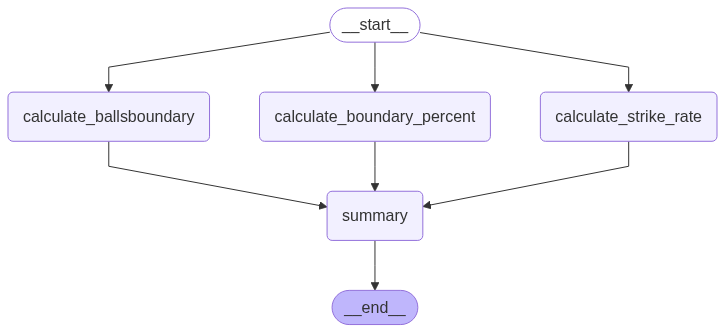

In [40]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())